In [17]:
import sys
sys.path.append(sys.path[0][:sys.path[0].find('DVML-P7') + len('DVML-P7')])
from Code.UtilityFunctions.get_data_path import get_path
from Code.UtilityFunctions.wikidata_functions import wikidata_query
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
yelp_wiki_category_mappings = pd.read_csv(get_path('yelp_wiki_schema_triples_df.csv'))

In [4]:
def get_subclass_of_wikientity(qid):
    try:
        query = f"""SELECT ?item ?itemLabel 
                WHERE 
                    {{
                    wd:{qid} wdt:P279 ?item .
                    SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
                    }}"""
        df = wikidata_query(query)[['item.value', 'itemLabel.value']]
        df['item.value'] = df.apply(lambda x: x['item.value'][31:], axis=1)
        df.rename(columns={'item.value': 'subclassOf', 'itemLabel.value': 'subclassOf_label'}, inplace=True)
        df['qid'] = qid
        return df
    except:
        pass
get_subclass_of_wikientity('Q11707')

,subclassOf,subclassOf_label,qid
0,Q41176,building,Q11707
1,Q41958,foodservice,Q11707
2,Q1431026,horeca,Q11707
3,Q62602544,eating and lodging,Q11707


In [5]:
df = yelp_wiki_category_mappings[['split_category', 'SchemaType', 'schema_or_yelp_category', 'qid', 'qid_label']].drop_duplicates()

In [6]:
df['SchemaType'].dropna()

0            Restaurant
6                Retail
7               Service
8                DaySpa
9                DaySpa
             ...       
1981        Osteopathic
1983           CityHall
1985      ReturnAtKiosk
1986    ParkingFacility
1989              Beach
Name: SchemaType, Length: 431, dtype: object

In [7]:
df[~df['SchemaType'].isna()]

,split_category,SchemaType,schema_or_yelp_category,qid,qid_label
0,Restaurant,Restaurant,Restaurant,Q11707,restaurant
6,Shopping,Retail,Retail,Q126793,retail
7,HomeService,Service,Service,Q44127,server
8,Beauty,DaySpa,DaySpa,NaN,NaN
9,Spa,DaySpa,DaySpa,NaN,NaN
...,...,...,...,...,...
1981,Osteopath,Osteopathic,Osteopathic,NaN,NaN
1983,TownHall,CityHall,CityHall,Q35606,Victoria Jubilee Town Hall
1985,Kiosk,ReturnAtKiosk,ReturnAtKiosk,NaN,NaN
1986,BikeParking,ParkingFacility,ParkingFacility,Q6501349,parking lot


In [8]:
df[~df['SchemaType'].isna()]

,split_category,SchemaType,schema_or_yelp_category,qid,qid_label
0,Restaurant,Restaurant,Restaurant,Q11707,restaurant
6,Shopping,Retail,Retail,Q126793,retail
7,HomeService,Service,Service,Q44127,server
8,Beauty,DaySpa,DaySpa,NaN,NaN
9,Spa,DaySpa,DaySpa,NaN,NaN
...,...,...,...,...,...
1981,Osteopath,Osteopathic,Osteopathic,NaN,NaN
1983,TownHall,CityHall,CityHall,Q35606,Victoria Jubilee Town Hall
1985,Kiosk,ReturnAtKiosk,ReturnAtKiosk,NaN,NaN
1986,BikeParking,ParkingFacility,ParkingFacility,Q6501349,parking lot


In [9]:
df['qid_label'].dropna().shape

(699,)

In [10]:
df.loc[~df['SchemaType'].isna(), 'qid_label'].shape

(431,)

In [11]:
df['schema_or_yelp_category'].unique().shape

(1239,)

In [12]:
yelp_wiki_category_mappings['schema_or_yelp_category'].unique().shape

(1239,)

In [13]:
yelp_wiki_category_mappings.groupby('qid_label').count().sort_values('qid', ascending=False)

,category,occurences,split_category,SchemaType,schema_or_yelp_category,qid,subclassOf,subclassOf_label
qid_label,,,,,,,,
park,25,25,25,25,25,25,25,25
motorcycle,25,25,25,25,25,25,25,25
ski resort,25,25,25,25,25,25,25,25
dentist,21,21,21,21,21,21,21,21
car dealership,21,21,21,21,21,21,21,21
...,...,...,...,...,...,...,...,...
fondue,1,1,1,0,1,1,1,1
fishing,1,1,1,0,1,1,1,1
fertility,1,1,1,0,1,1,1,1


Text(0, 0.5, 'Proportion of Entities')

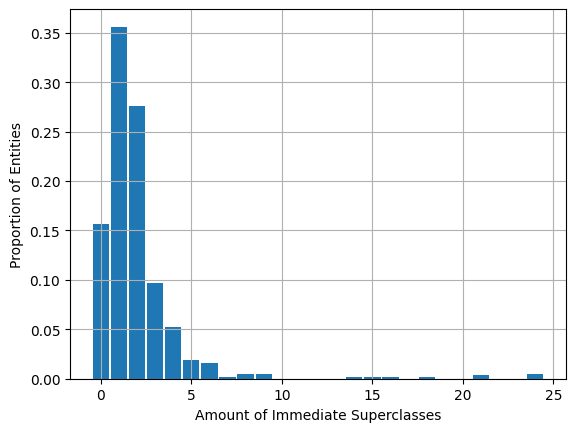

In [18]:
data = yelp_wiki_category_mappings.groupby('qid_label').count().sort_values('qid', ascending=False)['subclassOf'].hist(bins=25, alpha=1, align='left', rwidth=0.9, density=True)
data.set_xlabel("Amount of Immediate Superclasses")
data.set_ylabel("Proportion of Entities")

Text(0, 0.5, 'count')

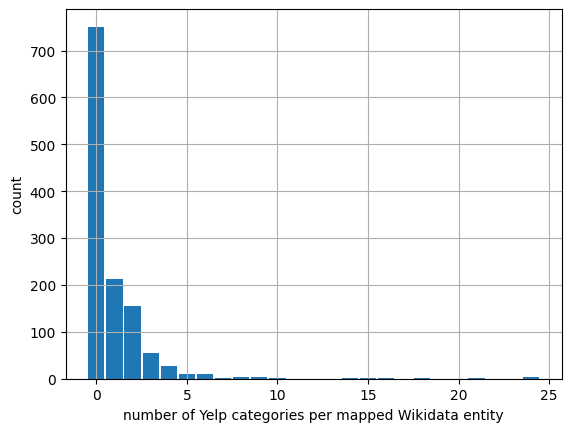

In [ ]:
import matplotlib.pyplot as plt
data = yelp_wiki_category_mappings.groupby('schema_or_yelp_category').count().sort_values('qid', ascending=False)['subclassOf'].hist( bins=25, alpha=1, align='left', rwidth=0.9)
data.set_xlabel("number of Yelp categories per mapped Wikidata entity")
data.set_ylabel("count")

In [12]:
df['qid'].dropna().shape[0]

576